<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:
- **TASK 1:** Mark all launch sites on a map
- **TASK 2:** Mark the success/failed launches for each site on the map
- **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [57]:
# !pip3 install folium
# !pip3 install wget

In [58]:
import folium
import wget
import pandas as pd

In [59]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site. 


In [60]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [61]:
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


Now, you can take a look at what are the coordinates for each site.


In [62]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [63]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example, 


In [64]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=100, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle. 


Now, let's add a circle for each launch site in data frame `launch_sites`


_TODO:_  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [65]:
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [66]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label

for index, record in launch_sites_df.iterrows():
    coordinates = [record['Lat'], record['Long']]
    # circle_marker = folium.CircleMarker(
    #     location=coordinates, 
    #     radius=10,  # radius in pixels
    #     color='#d35400', 
    #     fill=True,
    #     fill_color='#d35400'
    # ).add_child(folium.Popup(record['Launch Site']))
    circle = folium.Circle(
        location=coordinates, 
        radius=50, 
        color='#d35400', 
        fill=True
    ).add_child(folium.Popup(record['Launch Site']))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
    marker = folium.map.Marker(
        location=coordinates,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 12px; color:#d35400;"><b>{record["Launch Site"]}</b></div>'
        )
    )
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:
- Are all launch sites in proximity to the Equator line?
- Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


All four launch sites are located near the equator and on the coast. Moreover, three of the four are located on Merritt Island. "CCAFS LC-40" and "CCAFS SLC-40" are the same launch site at Cape Canaveral Air Force Station, but with slightly different designations. CCAFS LC-40: "LC" stands for "Launch Complex", which is the traditional designation for launch sites. CCAFS SLC-40: "SLC" stands for "Space Launch Complex", which is a more modern designation and is more often used in documentation and official names.
Perhaps the possibility of combining this data should be considered.

Расположение стартовых площадок SpaceX обусловлено несколькими ключевыми факторами, включая географические, технические и экономические аспекты. Вот некоторые из основных причин:

### 1. Географическое расположение
- **Близость к экватору**: Стартовые площадки, расположенные ближе к экватору, такие как на мысе Канаверал (CCAFS и KSC), позволяют ракетам воспользоваться большей скоростью вращения Земли. Это делает запуск в восточном направлении более эффективным с точки зрения затрат топлива.
- **Открытые океанские районы**: Запуски над океанами минимизируют риск для населенных пунктов в случае аварии ракеты. В случае падения частей ракеты или аварийного сброса, океан предоставляет безопасное место для их падения.

### 2. Технические требования
- **Разнообразие орбитальных плоскостей**: Различные стартовые площадки позволяют SpaceX запускать ракеты в разные орбитальные плоскости. Например, запуск с Vandenberg Space Force Base (VAFB) в Калифорнии удобен для полярных и солнечно-синхронных орбит, так как ракеты могут лететь на юг над Тихим океаном.
- **Технологическая инфраструктура**: Некоторые стартовые площадки имеют долгую историю использования для космических запусков и предлагают развитую инфраструктуру, необходимую для подготовки и запуска ракет. Это включает в себя пусковые установки, контрольные центры, заправочные станции и другую необходимую инфраструктуру.

### 3. Экономические и логистические факторы
- **Историческое использование и доступные ресурсы**: Некоторые площадки, такие как на мысе Канаверал, использовались NASA и другими агентствами десятилетиями. Это значит, что есть готовая инфраструктура и опытный персонал.
- **Расположение производственных мощностей**: Заводы и производственные мощности SpaceX расположены в Хоторне, Калифорния, что делает логистически удобным использование VAFB для запусков. Тесное расположение также уменьшает затраты на транспортировку ракетных частей.
- **Политическая и экономическая поддержка**: SpaceX получает поддержку от федеральных и местных правительств для использования этих площадок. Это может включать финансовые стимулы, субсидии или упрощенные регуляторные процессы.

### Основные стартовые площадки SpaceX
1. **Cape Canaveral Space Force Station (CCAFS) и Kennedy Space Center (KSC), Флорида**
   - **CCAFS LC-40 и SLC-40**: Используются для запуска коммерческих, правительственных и военных спутников.
   - **KSC LC-39A**: Площадка, арендованная у NASA, используется для запусков экипажа на МКС и других миссий.

2. **Vandenberg Space Force Base (VAFB), Калифорния**
   - **SLC-4E**: Используется для запусков на полярные орбиты и солнечно-синхронные орбиты. Запуск на такие орбиты требует полетов на юг или север, что возможно из этой базы.

3. **Boca Chica, Техас**
   - **SpaceX Starbase**: Основное место для разработки и испытаний системы Starship. Это частная площадка SpaceX, что позволяет им иметь полный контроль над графиком и операциями.

### Заключение
Расположение стартовых площадок SpaceX оптимизировано для максимальной эффективности запусков, минимизации рисков и удовлетворения различных технических и орбитальных требований. Эти площадки выбраны на основе комбинации географических преимуществ, наличия необходимой инфраструктуры, экономических выгод и логистических соображений.

The location of SpaceX's launch sites is determined by several key factors, including geographical, technical, and economic considerations. Here are some of the main reasons:

### 1. Geographical Location
- **Proximity to the Equator**: Launch sites closer to the equator, such as those at Cape Canaveral (CCAFS and KSC), allow rockets to take advantage of the Earth's higher rotational speed. This makes eastward launches more fuel-efficient.
- **Open Ocean Areas**: Launches over oceans minimize the risk to populated areas in case of a rocket failure. If parts of the rocket fall off or there is an emergency jettison, the ocean provides a safe landing area.

### 2. Technical Requirements
- **Diverse Orbital Planes**: Different launch sites allow SpaceX to launch rockets into various orbital planes. For example, launches from Vandenberg Space Force Base (VAFB) in California are suitable for polar and sun-synchronous orbits because rockets can fly south over the Pacific Ocean.
- **Technological Infrastructure**: Some launch sites have a long history of being used for space launches and offer the necessary infrastructure for preparing and launching rockets. This includes launch pads, control centers, fueling stations, and other essential facilities.

### 3. Economic and Logistical Factors
- **Historical Use and Available Resources**: Some sites, like Cape Canaveral, have been used by NASA and other agencies for decades. This means there is existing infrastructure and experienced personnel.
- **Location of Manufacturing Facilities**: SpaceX's factories and manufacturing facilities are located in Hawthorne, California, making it logistically convenient to use VAFB for launches. Close proximity also reduces transportation costs for rocket components.
- **Political and Economic Support**: SpaceX receives support from federal and local governments to use these sites. This can include financial incentives, subsidies, or streamlined regulatory processes.

### Main SpaceX Launch Sites
1. **Cape Canaveral Space Force Station (CCAFS) and Kennedy Space Center (KSC), Florida**
   - **CCAFS LC-40 and SLC-40**: Used for launching commercial, government, and military satellites.
   - **KSC LC-39A**: A site leased from NASA, used for crewed missions to the ISS and other missions.

2. **Vandenberg Space Force Base (VAFB), California**
   - **SLC-4E**: Used for launches to polar orbits and sun-synchronous orbits. Launching to such orbits requires flights to the south or north, which is possible from this base.

3. **Boca Chica, Texas**
   - **SpaceX Starbase**: The main site for the development and testing of the Starship system. This is a private SpaceX site, allowing them full control over the schedule and operations.

### Conclusion
The location of SpaceX's launch sites is optimized for maximum launch efficiency, risk minimization, and meeting various technical and orbital requirements. These sites are chosen based on a combination of geographical advantages, available infrastructure, economic benefits, and logistical considerations.

# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [67]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records. 
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [68]:
marker_cluster = MarkerCluster().add_to(site_map)


_TODO:_ Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [69]:
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red


In [70]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


_TODO:_ For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [71]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)
# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color']),
        popup=folium.Popup(record['Launch Site'], parse_html=True)
    )
    marker_cluster.add_child(marker)

# Отображение карты
site_map

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [72]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


In [73]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

_TODO:_ Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [74]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# Insert New Multiple Columns into the DataFrame
new_columns_data = {'coast_lat': [28.56327, 28.56392, 28.60741, 34.63699], 
                    'coast_long': [-80.56792, -80.56802, -80.5933, -120.6246]}  
 
new_columns_df = pd.DataFrame(new_columns_data)
 
# Combine the original DataFrame and the new columns DataFrame
distances_df = pd.concat([launch_sites_df, new_columns_df], axis=1)

distances_df['distance'] = distances_df.apply(
    lambda row: calculate_distance(row['Lat'], row['Long'], row['coast_lat'], row['coast_long']), axis=1)
distances_df

,Launch Site,Lat,Long,coast_lat,coast_long,distance
0,CCAFS LC-40,28.562302,-80.577356,28.56327,-80.56792,0.928140
1,CCAFS SLC-40,28.563197,-80.576820,28.56392,-80.56802,0.863442
2,KSC LC-39A,28.573255,-80.646895,28.60741,-80.59330,6.467844
3,VAFB SLC-4E,34.632834,-120.610745,34.63699,-120.62460,1.349581


#### Check the nearest coast dots

In [75]:
# # check the dots of nearest coast line
# for index, record in distances_df.iterrows():
#     coordinates = [record['coast_lat'], record['coast_long']]
#     circle = folium.Circle(
#         location=coordinates, 
#         radius=5, 
#         color='#d35400', 
#         fill=True
#     ).add_child(folium.Popup(record['distance']))
# # Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
#     marker = folium.map.Marker(
#         location=coordinates,
#         # Create an icon as a text label
#         icon=DivIcon(
#             icon_size=(20,20),
#             icon_anchor=(0,0),
#             html=f'<div style="font-size: 12px; color:#d35400;"><b>{record["distance"]:.4f}</b></div>'
#         )
#     )
#     site_map.add_child(circle)
#     site_map.add_child(marker)
# site_map

#### Alternative method

In [76]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import math

# Создаем GeoDataFrame для стартовых площадок
launch_sites = gpd.GeoDataFrame({
    'name': [launch_sites_df.iloc[0]['Launch Site'], launch_sites_df.iloc[1]['Launch Site'], 
             launch_sites_df.iloc[2]['Launch Site'], launch_sites_df.iloc[3]['Launch Site']],
    'geometry': [Point(launch_sites_df.iloc[0]['Long'], launch_sites_df.iloc[0]['Lat']), 
                 Point(launch_sites_df.iloc[1]['Long'], launch_sites_df.iloc[1]['Lat']), 
                 Point(launch_sites_df.iloc[2]['Long'], launch_sites_df.iloc[2]['Lat']), 
                 Point(launch_sites_df.iloc[3]['Long'], launch_sites_df.iloc[3]['Lat'])]
}, crs="EPSG:4326")

# Создаем GeoDataFrame для береговой линии
coastline = gpd.GeoDataFrame({
    'geometry': [LineString([(-80.6093, 28.6254),
                             (-80.56792, 28.56327), 
                             (-80.56802, 28.56392),
                             (-80.58167, 28.59462), 
                             (-80.57493, 28.58633),
                             (-80.58231, 28.59733),                             
                             (-80.59004, 28.60404),                         
                             (-80.59329, 28.60740),
                             (-80.59330, 28.60741),
                             (-80.62724, 28.64953),
                             (-120.6246, 34.63699)])]
}, crs="EPSG:4326")

# Функция для нахождения ближайшей точки на линии
def nearest_point(point, line):
    return line.interpolate(line.project(point))

# Нахождение ближайших точек на береговой линии для каждой стартовой площадки
nearest_points = launch_sites['geometry'].apply(lambda x: nearest_point(x, coastline.unary_union))

# Добавление ближайших точек к GeoDataFrame
launch_sites['nearest_coast'] = nearest_points

# Функция для вычисления расстояния от точки до ближайшей точки на береговой линии
def distance_to_coast(point, line):
    nearest = nearest_point(point, line)
    # Расстояние в градусах
    distance_degrees = point.distance(nearest)
    # Преобразование расстояния в километры
    distance_km = distance_degrees * (math.pi / 180) * 6373  # 6371 км — радиус Земли
    return distance_km

# Вычисление расстояния от каждой стартовой площадки до ближайшей точки на береговой линии
launch_sites['distance_to_coast_km'] = launch_sites.apply(lambda row: distance_to_coast(row['geometry'], coastline.unary_union), axis=1)

launch_sites


,name,geometry,nearest_coast,distance_to_coast_km
0,CCAFS LC-40,POINT (-80.57736 28.56230),POINT (-80.57037 28.56695),0.933281
1,CCAFS SLC-40,POINT (-80.57682 28.56320),POINT (-80.57062 28.56733),0.828422
2,KSC LC-39A,POINT (-80.64690 28.57325),POINT (-80.59679 28.60662),6.695613
3,VAFB SLC-4E,POINT (-120.61075 34.63283),POINT (-120.61044 34.63487),0.229014


#### Подсчет с помощью гео-данных Natural Earth

In [77]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

# Загрузка данных о береговой линии из Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
coastline = world[world['continent'] == 'North America'].boundary

# Проверка данных о береговой линии
coastline = coastline.unary_union

# Создаем GeoDataFrame для стартовых площадок
launch_sites = gpd.GeoDataFrame({
    'name': [launch_sites_df.iloc[0]['Launch Site'], launch_sites_df.iloc[1]['Launch Site'], 
             launch_sites_df.iloc[2]['Launch Site'], launch_sites_df.iloc[3]['Launch Site']],
    'geometry': [Point(launch_sites_df.iloc[0]['Long'], launch_sites_df.iloc[0]['Lat']), 
                 Point(launch_sites_df.iloc[1]['Long'], launch_sites_df.iloc[1]['Lat']), 
                 Point(launch_sites_df.iloc[2]['Long'], launch_sites_df.iloc[2]['Lat']), 
                 Point(launch_sites_df.iloc[3]['Long'], launch_sites_df.iloc[3]['Lat'])]
}, crs="EPSG:4326")

# Функция для нахождения ближайшей точки на линии
def nearest_point_on_coast(point, coastline):
    nearest_geoms = nearest_points(point, coastline)
    return nearest_geoms[1]

# Нахождение ближайших точек на береговой линии для каждой стартовой площадки
launch_sites['nearest_coast'] = launch_sites['geometry'].apply(lambda x: nearest_point_on_coast(x, coastline))

# Функция для вычисления расстояния от точки до ближайшей точки на береговой линии
def distance_to_coast(point, nearest_point):
    distance_degrees = point.distance(nearest_point)
    # Преобразование расстояния в километры
    distance_km = distance_degrees * (math.pi / 180) * 6373  # 6371 км — радиус Земли
    return distance_km

# Вычисление расстояния от каждой стартовой площадки до ближайшей точки на береговой линии
launch_sites['distance_to_coast'] = launch_sites.apply(lambda row: distance_to_coast(row['geometry'], row['nearest_coast']), axis=1)

# Вывод результатов
print(launch_sites)

           name                     geometry                nearest_coast  \
0   CCAFS LC-40   POINT (-80.57736 28.56230)   POINT (-80.58800 28.55562)   
1  CCAFS SLC-40   POINT (-80.57682 28.56320)   POINT (-80.58825 28.55602)   
2    KSC LC-39A   POINT (-80.64690 28.57325)   POINT (-80.61259 28.59479)   
3   VAFB SLC-4E  POINT (-120.61075 34.63283)  POINT (-120.62742 34.62914)   

   distance_to_coast  
0           1.398002  
1           1.501482  
2           4.505005  
3           1.899826  


C:\Users\valentina.chimitova\AppData\Local\Temp\ipykernel_27904\3402788189.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


#### ...

_TODO:_ After obtained its coordinate, create a `folium.Marker` to show the distance


In [78]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

In [79]:
# check the dots of nearest coast line
for index, record in distances_df.iterrows():
    coordinates = [record['coast_lat'], record['coast_long']]
    circle = folium.Circle(
        location=coordinates, 
        radius=3, 
        color='#d35400', 
        fill=True
    ).add_child(folium.Popup(record['distance']))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
    marker = folium.map.Marker(
        location=coordinates,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 12px; color:#d35400;"><b>{record["distance"]:.4f}_km</b></div>'
        )
    )
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

_TODO:_ Draw a `PolyLine` between a launch site to the selected coastline point


In [80]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
for index, record in distances_df.iterrows():
    coordinates = [(record['Lat'], record['Long']), (record['coast_lat'], record['coast_long'])]
    lines=folium.PolyLine(
        locations=coordinates, 
        weight=1)
    site_map.add_child(lines)
site_map

Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


_TODO:_ Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


In [81]:
def add_new_columns(df, columns,col1,col2,col3):
    columns = pd.DataFrame(columns)
    # Combine the original DataFrame and the new columns DataFrame
    df = pd.concat([df, columns], axis=1)
    df[col3] = df.apply(
        lambda row: calculate_distance(row['Lat'], row['Long'], row[col1], row[col2]), axis=1)
    return(df)

In [82]:
def draw_dist_to(distances_df, col1,col2,col3):
    for index, record in distances_df.iterrows():
        coordinates = [record[col1], record[col2]]
        circle = folium.Circle(
            location=coordinates, 
            radius=3, 
            color='#d35400', 
            fill=True
        ).add_child(folium.Popup(record[col3]))
    # Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
        popup_text = f"{record[col3]:.4f}_km"
        marker = folium.map.Marker(
            location=coordinates,
            # Create an icon as a text label
            icon=DivIcon(
                icon_size=(20,20),
                icon_anchor=(0,0),
                html=f'<div style="font-size: 12px; color:#d35400;"><b>{popup_text}</b></div>'
            )
        )
        coord = [(record['Lat'], record['Long']), (record[col1], record[col2])]
        lines=folium.PolyLine(
            locations=coord, 
            weight=1)
        site_map.add_child(lines)
        site_map.add_child(circle)
        site_map.add_child(marker)
    # return(site_map)

In [83]:
new_columns_data = {'railway_lat': [28.56364, 28.56428, 28.57311, 34.63533], 
                    'railway_long': [-80.58697, -80.58684, -80.65394, -120.62409]}  
distances_df = add_new_columns(distances_df, new_columns_data, 'railway_lat', 'railway_long', 'distance_to_railway')

draw_dist_to(distances_df, 'railway_lat', 'railway_long', 'distance_to_railway')

In [84]:
new_columns_data = {'highway_lat': [28.56288, 28.56365, 28.57603, 34.63797], 
                    'highway_long': [-80.57069, -80.57081, -80.64502, -120.62093]}  
distances_df = add_new_columns(distances_df, new_columns_data, 'highway_lat', 'highway_long', 'distance_to_highway')

draw_dist_to(distances_df, 'highway_lat', 'highway_long', 'distance_to_highway')

In [85]:
new_columns_data = {'city_lat': [28.61195, 28.61195, 28.61195, 34.63773], 
                    'city_long': [-80.80925, -80.80925, -80.80925, -120.45822]}  
distances_df = add_new_columns(distances_df, new_columns_data, 'city_lat', 'city_long', 'distance_to_city')

draw_dist_to(distances_df, 'city_lat', 'city_long', 'distance_to_city')

In [86]:
site_map


In [87]:
distances_df

,Launch Site,Lat,Long,coast_lat,coast_long,distance,railway_lat,railway_long,distance_to_railway,highway_lat,highway_long,distance_to_highway,city_lat,city_long,distance_to_city
0,CCAFS LC-40,28.562302,-80.577356,28.56327,-80.56792,0.928140,28.56364,-80.58697,0.950886,28.56288,-80.57069,0.654432,28.61195,-80.80925,23.312520
1,CCAFS SLC-40,28.563197,-80.576820,28.56392,-80.56802,0.863442,28.56428,-80.58684,0.986249,28.56365,-80.57081,0.589287,28.61195,-80.80925,23.339998
2,KSC LC-39A,28.573255,-80.646895,28.60741,-80.59330,6.467844,28.57311,-80.65394,0.688335,28.57603,-80.64502,0.358967,28.61195,-80.80925,16.430109
3,VAFB SLC-4E,34.632834,-120.610745,34.63699,-120.62460,1.349581,34.63533,-120.62409,1.252440,34.63797,-120.62093,1.093200,34.63773,-120.45822,13.969508


In [88]:
wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")

'spacex_launch_dash (1).csv'

In [89]:
df_spc = pd.read_csv('spacex_launch_dash.csv')
df_spc.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [90]:
import matplotlib as plt
import seaborn as sns

<Axes: xlabel='Payload Mass (kg)', ylabel='class'>

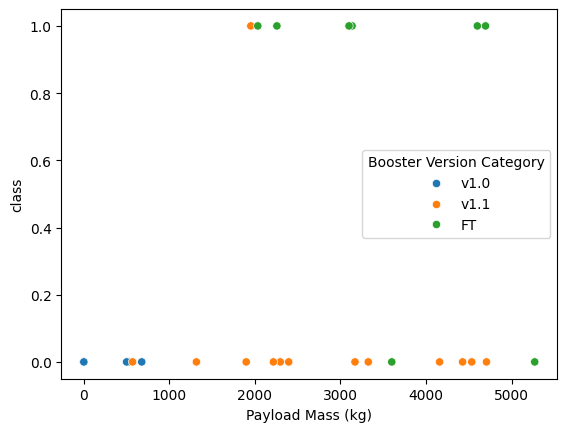

In [91]:
LC = df_spc.loc[df_spc['Launch Site'] == 'CCAFS LC-40']

fig = sns.scatterplot(LC, x='Payload Mass (kg)', y='class', hue='Booster Version Category')
fig

<Axes: xlabel='Payload Mass (kg)', ylabel='class'>

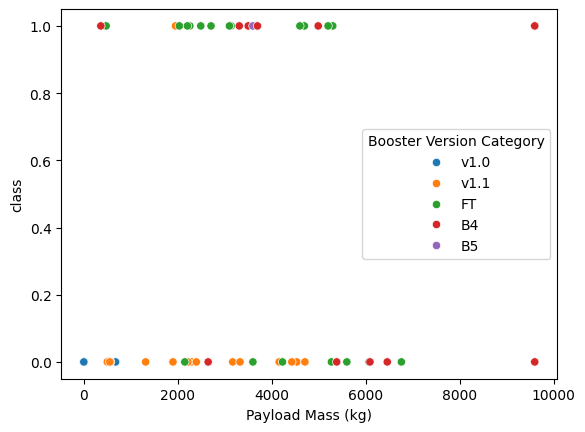

In [92]:
fig = sns.scatterplot(df_spc, x='Payload Mass (kg)', y='class', hue='Booster Version Category')
fig

A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


In [93]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site


After you plot distance lines to the proximities, you can answer the following questions easily:
- Are launch sites in close proximity to railways?
- Are launch sites in close proximity to highways?
- Are launch sites in close proximity to coastline?
- Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


### Other Contributors


Joseph Santarcangelo


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2021-05-26|1.0|Yan|Created the initial version|


Copyright © 2021 IBM Corporation. All rights reserved.
